In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import unidecode, re
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_auc_score
from scipy import *
from sklearn.feature_selection import SelectKBest, f_regression
from catboost import CatBoostClassifier
import lightgbm as lgb
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

my_font = dict(
            family="Courier New, monospace",
            size=18,
            color="Black",
            variant="small-caps",
) 
from cleaner import dataset_cleaner
df = pd.read_csv("data/train.csv")
df_t = pd.read_csv("data/test.csv")

df_train = df.copy()
df_test  = df_t.copy()



<Axes: >

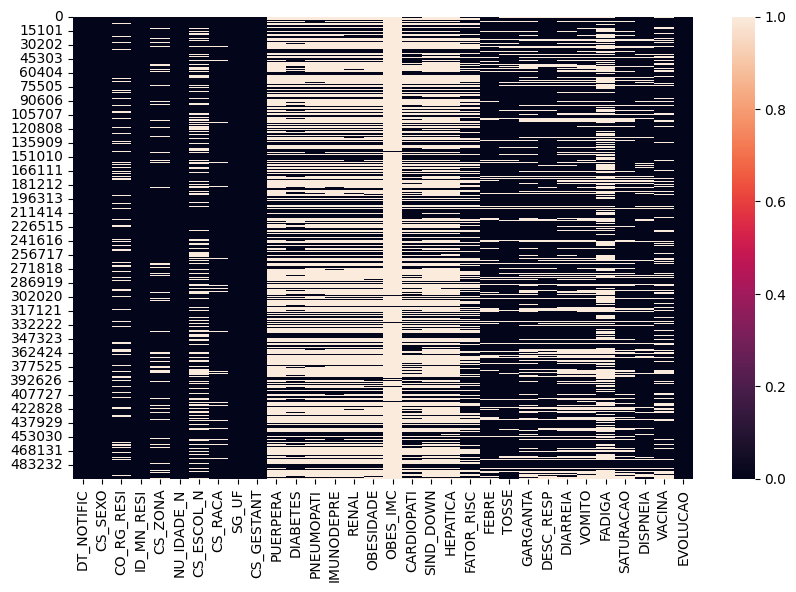

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull())

In [4]:

# df_train.filling_unknown(9)
# df_test.filling_unknown(9)

In [5]:
#px.pie(df.groupby(['EVOLUCAO', 'OBESIDADE']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="OBESIDADE", hole=0.3).show()
# 2.0    81.85
# 1.0    13.42
# 9.0     4.73 - mid 

#px.pie(df.groupby(['EVOLUCAO', 'RENAL']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="RENAL", hole=0.3).show()
# 2.0    82.83
# 1.0    14.11
# 9.0     3.06 - weak 

# px.pie(df.groupby(['EVOLUCAO', 'TOSSE']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="TOSSE", hole=0.3).show()
# 1.0    74.09
# 2.0    23.61
# 9.0     2.30 - eak because most people had it 


# px.pie(df.groupby(['EVOLUCAO', 'FADIGA']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="FADIGA", hole=0.3).show()
# 2.0    68.46
# 1.0    25.68
# 9.0     5.86 - most people did not have it 

# px.pie(df.groupby(['EVOLUCAO', 'HEPATICA']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="HEPATICA", hole=0.3).show() # 
# 2.0    93.57
# 9.0     3.42
# 1.0     3.01 - weak - most people did not have it 
 
# px.pie(df.groupby(['EVOLUCAO', 'VACINA']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="VACINA", hole=0.3).show() 
# 9.0    55.54
# 2.0    29.76
# 1.0    14.70 - ignored most of the time 

# px.pie(df.groupby(['EVOLUCAO', 'GARGANTA']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="GARGANTA", hole=0.3).show() 
# 50% did not know about GARGANTA. 27.4% had GARGANta. 34% did not have garganta 
# 2.0    75.27
# 1.0    19.72
# 9.0     5.01 - weak might be eliminated 

# px.pie(df.groupby(['EVOLUCAO', 'VOMITO']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="VOMITO", hole=0.3).show()
# 2.0    85.15
# 1.0     9.67
# 9.0     5.18 - weak: might drop

# px.pie(df.groupby(['EVOLUCAO', 'FEBRE']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="FEBRE", hole=0.3).show()
# 1.0    66.67
# 2.0    30.79
# 9.0     2.54 - strong 

# px.pie(df.groupby(['EVOLUCAO', 'DIABETES']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="DIABETES", hole=0.3).show()
# 1.0    66.67

# px.pie(df.groupby(['EVOLUCAO', 'DIARREIA']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="DIARREIA", hole=0.3).show()
# 2.0    80.09 most people did not have it and the majority of those who had survived 
# 1.0    14.97
# 9.0     4.94 - weak 

# px.pie(df.groupby(['EVOLUCAO', 'CARDIOPATI']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="CARDIOPATI", hole=0.3).show()
# 1.0    68.74
# 2.0    30.01
# 9.0     1.24 most of those had it. strong

# px.pie(df.groupby(['EVOLUCAO', 'PNEUMOPATI']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="PNEUMOPATI", hole=0.3).show()
# 2.0    84.19
# 1.0    12.62
# 9.0     3.19 - most did not have it and those who had it mostly died 

# px.pie(df.groupby(['EVOLUCAO', 'DISPNEIA']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="DISPNEIA", hole=0.3).show()
# 1.0    84.65
# 2.0    13.77
# 9.0     1.58 - most had - strong


# px.pie(df.groupby(['EVOLUCAO', 'DISPNEIA']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="DISPNEIA", hole=0.3).show()
# - strong 


# px.pie(df.groupby(['EVOLUCAO', 'DESC_RESP']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="DESC_RESP", hole=0.3).show()
# 1.0    75.86
# 2.0    22.04
# 9.0     2.10 - strong 

# px.pie(df.groupby(['EVOLUCAO', 'FATOR_RISC']).size().reset_index(name='c'), values='c', names='EVOLUCAO', facet_col="FATOR_RISC", hole=0.3).show()
# - weak 

In [17]:
# # Chi-square test to assess significance
# from scipy.stats import chi2_contingency

# def stats(df,col, target):
#     raw_crosstab = pd.crosstab(df[f'{col}'], df[f'{target}'])
#     chi2, p_value, dof, expected = chi2_contingency(raw_crosstab)
#     print(f"\nChi-square statistic: {chi2:.2f}")
#     print(f"P-value: {p_value:.4f}")  # High p-value (>0.05) = weak association
#     print("\nRaw Crosstab (Counts):")
#     print(raw_crosstab)
    
#     # Confirm death distribution (to match your insight)
#     deaths_only = df[df[f'{target}'] == 1]
#     col_deaths = deaths_only[f'{col}'].value_counts(normalize=True) * 100
#     print(f"{col} Distribution Among Deaths (EVOLUCAO=1):")
#     print(col_deaths.round(2))
    
# I = stats(df_train.df,'DISPNEIA','EVOLUCAO')

# n = raw_crosstab.values.sum()
# cramers_v = np.sqrt(chi2 / (n * (min(raw_crosstab.shape) - 1)))
# print(f"Cramer’s V: {cramers_v:.3f}")  # 0.1-0.3 = small, 0.3-0.5 = medium, 0.6 > you might wanna keep this shit

# First Cleaning

In [ ]:
# dropping CS_SEXO == I. what is even this?? 

# df_train = df_train[df_train['CS_SEXO'] != 'I']
# df_test = df_test[df_test['CS_SEXO'] != 'I']


# dropping useless columns


df_train.drop(labels=["DT_NOTIFIC", "ID_MN_RESI","OBES_IMC", "CO_RG_RESI"], axis=1, inplace=True)
df_test.drop(labels=["DT_NOTIFIC", "ID_MN_RESI","OBES_IMC", "CO_RG_RESI"], axis=1, inplace=True)


# checking if there is any male with missing PUERPERA - tf is this?? lol 

condition_tr = ((df_train['CS_SEXO'] == 'M') & (df_train['PUERPERA'].isnull()))
condition_te = ((df_test['CS_SEXO'] == 'M') & (df_test['PUERPERA'].isnull()))
df_train.loc[condition_tr, 'PUERPERA'] = 2
df_test.loc[condition_te, 'PUERPERA'] = 2


In [47]:
df_test

,CS_SEXO,CS_ZONA,NU_IDADE_N,CS_ESCOL_N,CS_RACA,SG_UF,CS_GESTANT,PUERPERA,DIABETES,PNEUMOPATI,...,FEBRE,TOSSE,GARGANTA,DESC_RESP,DIARREIA,VOMITO,FADIGA,SATURACAO,DISPNEIA,VACINA
0,F,1.0,60,9.0,1.0,RS,9,NaN,NaN,NaN,...,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,9.0
1,M,1.0,28,NaN,9.0,PE,6,2.0,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,M,NaN,45,NaN,NaN,AL,6,2.0,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,F,NaN,38,NaN,4.0,SP,5,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,M,1.0,50,0.0,4.0,PE,6,2.0,NaN,NaN,...,2.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124576,F,1.0,39,4.0,1.0,RN,5,NaN,NaN,NaN,...,2.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,9.0
124577,M,1.0,37,3.0,1.0,SP,6,2.0,1.0,2.0,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0
124578,M,1.0,34,4.0,1.0,SC,6,2.0,NaN,NaN,...,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,9.0
124579,F,1.0,78,1.0,4.0,AM,5,NaN,NaN,1.0,...,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0


In [4]:
cat_columns1 = [col for col in df_train.columns if col not in ['NU_IDADE_N', 'EVOLUCAO']]

df_train = df_train.fillna(9)
df_test =  df_test.fillna(9)

for col in cat_columns1:
    
    if df_train[col].dtype == 'float64':
        df_train[col] = df_train[col].astype(int)
        df_train[col] = df_train[col].astype('category')
        
    if df_test[col].dtype == 'float64':
        df_test[col] = df_test[col].astype(int)
    df_train[col] = df_train[col].astype('category')
    df_test[col]  = df_test[col].astype('category')


cols_to_replace = df_train.columns.difference(['NU_IDADE_N'])
cols_to_replace_TEST = df_test.columns.difference(['NU_IDADE_N', 'EVOLUCAO'])

df_train[cols_to_replace] = df_train[cols_to_replace].replace(9, np.nan)
df_test[cols_to_replace_TEST] = df_test[cols_to_replace_TEST].replace(9, np.nan)



df_train.drop('FATOR_RISC', axis=1, inplace=True)
df_test.drop('FATOR_RISC', axis=1, inplace=True)

In [5]:
# Now we are going to train a model to predict these missing values
import catboost as cb

def impute_features_with_catboost(df: pd.DataFrame) -> pd.DataFrame:
    """
    Imputes missing values in feature columns using a model-based approach with CatBoost.
    It iterates through each column with NaNs and trains a model to predict the missing values
    based on all other columns.

    Args:
        df (pd.DataFrame): The input DataFrame with missing values in feature columns.

    Returns:
        pd.DataFrame: A new DataFrame with all missing values imputed.
    """
    
    df_imputed = df.copy()
    cols_with_missing = [col for col in df_imputed.columns if df_imputed[col].isnull().any()]
    
    print(f"Columns to impute: {cols_with_missing}")

    for col_to_impute in cols_with_missing:
        print(f"\n--- Imputing column: {col_to_impute} ---")

        feature_cols = [col for col in df_imputed.columns if col != col_to_impute]
        train_df = df_imputed[df_imputed[col_to_impute].notna()]
        impute_df = df_imputed[df_imputed[col_to_impute].isna()]
        
        if impute_df.empty:
            print(f"No missing values to impute in {col_to_impute}.")
            continue

        # Use .copy() to avoid pandas SettingWithCopyWarning
        X_train = train_df[feature_cols].copy()
        y_train = train_df[col_to_impute]
        X_to_impute = impute_df[feature_cols].copy()

        # --- NEW FIX: Handle missing values within the feature set ---
        # Before training, we must fill any remaining NaNs in the predictor columns.
        for feature in feature_cols:
            if (X_train[feature].dtype == 'category') or( X_train[feature].dtype == 'object') :
                # For categorical predictors, fill with a placeholder.
                placeholder = 'Missing_Value'
                if placeholder not in X_train[feature].cat.categories:
                    X_train[feature] = X_train[feature].cat.add_categories(placeholder)
                if placeholder not in X_to_impute[feature].cat.categories:
                    X_to_impute[feature] = X_to_impute[feature].cat.add_categories(placeholder)
                
                X_train[feature].fillna(placeholder, inplace=True)
                X_to_impute[feature].fillna(placeholder, inplace=True)
            
            elif pd.api.types.is_numeric_dtype(X_train[feature]):
                # For numerical predictors, a simple median fill is a robust strategy.
                median_val = X_train[feature].median()
                X_train[feature].fillna(median_val, inplace=True)
                X_to_impute[feature].fillna(median_val, inplace=True)
        # --- END OF FIX ---

        categorical_features_indices = [
            i for i, col in enumerate(X_train.columns) if (X_train[col].dtype == 'category') or( X_train[col].dtype == 'object') 
        ]

        # Choose and train the appropriate CatBoost model
        if df_imputed[col_to_impute].dtype == 'category':
            print("Using CatBoostClassifier...")
            model = cb.CatBoostClassifier(
                iterations=200, verbose=0, cat_features=categorical_features_indices, task_type="GPU"
            )
        
        model.fit(X_train, y_train)
        
        predicted_values = model.predict(X_to_impute)
        
        df_imputed.loc[df_imputed[col_to_impute].isna(), col_to_impute] = predicted_values
        print(f"Successfully imputed {len(predicted_values)} values in '{col_to_impute}'.")

    print("\nAll feature imputation complete!")
    return df_imputed

df_filled = impute_features_with_catboost(df_train)

Columns to impute: ['CS_ZONA', 'CS_ESCOL_N', 'CS_RACA', 'SG_UF', 'CS_GESTANT', 'PUERPERA', 'DIABETES', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'CARDIOPATI', 'SIND_DOWN', 'HEPATICA', 'FEBRE', 'TOSSE', 'GARGANTA', 'DESC_RESP', 'DIARREIA', 'VOMITO', 'FADIGA', 'SATURACAO', 'DISPNEIA', 'VACINA']

--- Imputing column: CS_ZONA ---
Using CatBoostClassifier...
Successfully imputed 56082 values in 'CS_ZONA'.

--- Imputing column: CS_ESCOL_N ---
Using CatBoostClassifier...
Successfully imputed 313419 values in 'CS_ESCOL_N'.

--- Imputing column: CS_RACA ---
Using CatBoostClassifier...
Successfully imputed 103628 values in 'CS_RACA'.

--- Imputing column: SG_UF ---
Using CatBoostClassifier...
Successfully imputed 44 values in 'SG_UF'.

--- Imputing column: CS_GESTANT ---
Using CatBoostClassifier...
Successfully imputed 24418 values in 'CS_GESTANT'.

--- Imputing column: PUERPERA ---
Using CatBoostClassifier...
Successfully imputed 133166 values in 'PUERPERA'.

--- Imputing column: DIABET

KeyboardInterrupt: 

In [6]:

import gc
def impute_features_with_lightgbm(df: pd.DataFrame) -> pd.DataFrame:
    """
    Imputes missing values in feature columns using LightGBM with native categorical support.
    Iterates through each column with NaNs and trains a model to predict missing values.

    Args:
        df (pd.DataFrame): Input DataFrame with missing values.

    Returns:
        pd.DataFrame: DataFrame with imputed values.
    """
    # Clear memory
    gc.collect()

    df_imputed = df.copy()
    cols_with_missing = [col for col in df_imputed.columns if df_imputed[col].isnull().any()]
    print(f"Columns to impute: {cols_with_missing}")

    for col_to_impute in cols_with_missing:
        print(f"\n--- Imputing column: {col_to_impute} ---")

        feature_cols = [col for col in df_imputed.columns if col != col_to_impute]
        train_df = df_imputed[df_imputed[col_to_impute].notna()]
        impute_df = df_imputed[df_imputed[col_to_impute].isna()]
        
        if impute_df.empty:
            print(f"No missing values to impute in {col_to_impute}.")
            continue

        X_train = train_df[feature_cols].copy()
        y_train = train_df[col_to_impute].copy()
        X_to_impute = impute_df[feature_cols].copy()

        # Handle missing values in predictor columns
        for feature in feature_cols:
            if X_train[feature].dtype.name in ['category', 'object']:
                placeholder = 'Missing_Value'
                if X_train[feature].dtype.name == 'category':
                    if placeholder not in X_train[feature].cat.categories:
                        X_train[feature] = X_train[feature].cat.add_categories(placeholder)
                    if placeholder not in X_to_impute[feature].cat.categories:
                        X_to_impute[feature] = X_to_impute[feature].cat.add_categories(placeholder)
                else:
                    X_train[feature] = X_train[feature].astype('category').cat.add_categories(placeholder)
                    X_to_impute[feature] = X_to_impute[feature].astype('category').cat.add_categories(placeholder)
                X_train[feature].fillna(placeholder, inplace=True)
                X_to_impute[feature].fillna(placeholder, inplace=True)
            elif pd.api.types.is_numeric_dtype(X_train[feature]):
                median_val = X_train[feature].median()
                X_train[feature].fillna(median_val, inplace=True)
                X_to_impute[feature].fillna(median_val, inplace=True)

        # Ensure categorical columns are of type 'category'
        for col in X_train.columns:
            if X_train[col].dtype.name in ['category', 'object']:
                X_train[col] = X_train[col].astype('category')
                X_to_impute[col] = X_to_impute[col].astype('category')

        # Identify categorical features
        categorical_features_indices = [
            i for i, col in enumerate(X_train.columns)
            if X_train[col].dtype.name == 'category'
        ]
        categorical_features_names = [X_train.columns[i] for i in categorical_features_indices]

        # Determine if column is categorical
        is_categorical = y_train.dtype.name in ['category', 'object']
        if is_categorical:
            y_train = y_train.astype('category')
        
        model = lgb.LGBMClassifier(
                n_estimators=150,
                learning_rate=0.05,
                max_depth=7,
                num_leaves=30,
                colsample_bytree=0.7,
                subsample=0.7,
                reg_alpha=0.1,
                reg_lambda=6,
                random_state=32,
                verbose=-1
            )
        try:
            model.fit(X_train, y_train)
        except Exception as e:
            print(f"Error training model for {col_to_impute}: {e}")
            continue

        # Predict missing values
        predicted_values = model.predict(X_to_impute)

        # Assign imputed values
        df_imputed.loc[df_imputed[col_to_impute].isna(), col_to_impute] = predicted_values
        print(f"Successfully imputed {len(predicted_values)} values in '{col_to_impute}'.")

        # Free memory
        del model, X_train, y_train, X_to_impute
        gc.collect()

    print("\nAll feature imputation complete!")
    return df_imputed

# Impute missing values
df_filled = impute_features_with_lightgbm(df_train)

Columns to impute: ['CS_ZONA', 'CS_ESCOL_N', 'CS_RACA', 'SG_UF', 'CS_GESTANT', 'PUERPERA', 'DIABETES', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'CARDIOPATI', 'SIND_DOWN', 'HEPATICA', 'FEBRE', 'TOSSE', 'GARGANTA', 'DESC_RESP', 'DIARREIA', 'VOMITO', 'FADIGA', 'SATURACAO', 'DISPNEIA', 'VACINA']

--- Imputing column: CS_ZONA ---
Successfully imputed 56082 values in 'CS_ZONA'.

--- Imputing column: CS_ESCOL_N ---
Successfully imputed 313419 values in 'CS_ESCOL_N'.

--- Imputing column: CS_RACA ---
Successfully imputed 103628 values in 'CS_RACA'.

--- Imputing column: SG_UF ---
Successfully imputed 44 values in 'SG_UF'.

--- Imputing column: CS_GESTANT ---
Successfully imputed 24418 values in 'CS_GESTANT'.

--- Imputing column: PUERPERA ---
Successfully imputed 133166 values in 'PUERPERA'.

--- Imputing column: DIABETES ---
Successfully imputed 256146 values in 'DIABETES'.

--- Imputing column: PNEUMOPATI ---
Successfully imputed 298305 values in 'PNEUMOPATI'.

--- Imputing column: 

In [7]:
df_filled.to_csv("filledwithclgb.csv", index=False)


In [ ]:
df_filled_test = impute_features_with_lightgbm(df_test)
df_filled_test.to_csv("testfilledwithlgb.csv", index=False)


Columns to impute: ['CS_ZONA', 'CS_ESCOL_N', 'CS_RACA', 'SG_UF', 'CS_GESTANT', 'PUERPERA', 'DIABETES', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'CARDIOPATI', 'SIND_DOWN', 'HEPATICA', 'FEBRE', 'TOSSE', 'GARGANTA', 'DESC_RESP', 'DIARREIA', 'VOMITO', 'FADIGA', 'SATURACAO', 'DISPNEIA', 'VACINA']

--- Imputing column: CS_ZONA ---
Successfully imputed 14101 values in 'CS_ZONA'.

--- Imputing column: CS_ESCOL_N ---
Successfully imputed 78392 values in 'CS_ESCOL_N'.

--- Imputing column: CS_RACA ---


In [52]:
df_filled.to_csv("filledwithctb.csv", index=False)


In [ ]:
df_filled_test = impute_features_with_catboost(df_test)
df_filled_test.to_csv("testfilledwithlgb.csv", index=False)


# Ensemble

In [16]:
# from sklearn.feature_selection import RFECV
# X = df_filled.drop('EVOLUCAO', axis=1)
# y = df_filled['EVOLUCAO']


# min_features_to_select = 1



# clf = CatBoostClassifier( iterations=150, learning_rate=0.05, depth=7, 
#                          random_seed=32, verbose=0)
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# rfecv = RFECV( estimator=clf, step=1,cv=cv, scoring="f1", min_features_to_select=min_features_to_select,n_jobs=-1)

# # Fit RFECV
# rfecv.fit(X, y)

# # Step 4: Output Results
# print(f"Optimal number of features: {rfecv.n_features_}")
# selected_features = X.columns[rfecv.support_].tolist()
# print("\nSelected Features:", selected_features)

# # Feature ranking
# ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': rfecv.ranking_}).sort_values('Ranking')
# print("\nFeature Rankings (1 = Selected, Higher = Eliminated Earlier):")
# print(ranking_df)

# # Plot CV scores
# plt.figure(figsize=(10, 6))
# plt.plot(range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select), rfecv.cv_results_['mean_test_score'])
# plt.xlabel('Number of Features')
# plt.ylabel('CV F1-Score')
# plt.title('RFECV: CV F1-Score vs. Number of Features')
# plt.show()



In [104]:
df_filled = pd.read_csv('filledwithclgb.csv')
columns_to_convert = [col for col in df_filled.columns if col != 'NU_IDADE_N']


# 3. Loop through the list and change the dtype for each column
for column in columns_to_convert:
    df_filled[column] = df_filled[column].astype('category')


fractional_df = df_filled.sample(frac=1, random_state=42)


X = fractional_df.drop('EVOLUCAO', axis=1)
y = fractional_df['EVOLUCAO']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from collections import Counter







categorical_features_indices = [
    i for i, col in enumerate(X_train.columns) 
    if X_train[col].dtype.name in ['category', 'object']
]

# Apply SMOTENC for oversampling
smotenc = SMOTENC(
    categorical_features=categorical_features_indices,
    random_state=32,
    sampling_strategy='auto',  # Balances all classes; adjust if needed
)
X_train_resampled, y_train_resampled = smotenc.fit_resample(X_train, y_train)
# Convert back to DataFrame and Series for consistency
X_res = pd.DataFrame(X_res, columns=X_train.columns)
y_res = pd.Series(y_res, name='EVOLUCAO')

print("Before:", Counter(y_train))
print("After:", Counter(y_res))

In [87]:
X_train_resampled.to_csv("xsamples.csv", index=False)
y_train_resampled.to_csv("ysamples.csv", index=False)

In [105]:
import xgboost as xgb
clf = xgb.XGBClassifier(
    device='cuda', base_score=0.5, booster='gbtree', callbacks=None,
    colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
    early_stopping_rounds=None, enable_categorical=True,
    eval_metric=None, gamma=0, grow_policy='depthwise',
    importance_type=None, interaction_constraints='',
    learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
    max_delta_step=0, max_depth=6, max_leaves=0,
    min_child_weight=1,monotone_constraints='()',
    n_estimators=100, n_jobs=2, num_parallel_tree=1, 
    objective='binary:logistic', predictor='auto', random_state=0, 
    reg_alpha=0
)

# Fit ensemble
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_valid)

# Ensure predictions are integers (if needed)
if y_pred.dtype != np.int64:
    y_pred = y_pred.astype(int)

# Print results
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
print("\nConfusion Matrix:")
print(cm)

/usr/local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:55:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82     65400
         1.0       0.66      0.56      0.60     34264

    accuracy                           0.75     99664
   macro avg       0.72      0.70      0.71     99664
weighted avg       0.74      0.75      0.74     99664


Confusion Matrix:
[[55478  9922]
 [15219 19045]]


In [77]:


test_pred = clf.predict_proba(df_test_filled)[:,1]
test_pred

pd.DataFrame(np.round(test_pred)).reset_index().to_csv('results/stack4.csv', header=['ID', 'EVOLUCAO'], index=False)

In [109]:
categorical_features_indices = [
            i for i, col in enumerate(X_train.columns) if (X_train[col].dtype == 'category') or( X_train[col].dtype == 'object') 
]

from sklearn.ensemble import StackingClassifier
# Identify categorical features
categorical_features_indices = [
    i for i, col in enumerate(X_train.columns) 
    if X_train[col].dtype in ['category', 'object']
]

# LightGBM with GPU
params_lgb = {
    'n_estimators': 150,
    'learning_rate': 0.05,
    'max_depth': 7,
    'random_state': 32,
    'num_leaves': 30,
    'colsample_bytree': 0.7,
    'reg_alpha': 0.1,
    'reg_lambda': 6,
    'subsample': 0.7,  # Renamed from bagging_fraction for clarity
    'subsample_freq': 1,  # Renamed from bagging_freq
    'verbose': -1,
    'class_weight': {0: 1, 1: 5},# Minimize logging,
    
}
lgbm = lgb.LGBMClassifier(**params_lgb)



lgbm.fit(X_train, y_train)

# Evaluate
y_pred = stack.predict(X_valid)

# Ensure predictions are integers (if needed)
if y_pred.dtype != np.int64:
    y_pred = y_pred.astype(int)

# Print results
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
print("\nConfusion Matrix:")


df_importance = pd.DataFrame({
    'feature': lgbm.feature_name_,
    'importance': lgbm.feature_importances_
}).sort_values(by="importance", ascending=False)

print(df_importance)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     65400
         1.0       0.66      0.57      0.61     34264

    accuracy                           0.75     99664
   macro avg       0.72      0.71      0.71     99664
weighted avg       0.74      0.75      0.75     99664


Confusion Matrix:
       feature  importance
5        SG_UF         986
2   NU_IDADE_N         591
3   CS_ESCOL_N         410
4      CS_RACA         225
25      VACINA         216
19   DESC_RESP         200
23   SATURACAO         178
24    DISPNEIA         131
0      CS_SEXO         122
15    HEPATICA         120
14   SIND_DOWN         120
17       TOSSE         110
22      FADIGA         107
12   OBESIDADE          97
9   PNEUMOPATI          93
6   CS_GESTANT          90
11       RENAL          85
20    DIARREIA          84
21      VOMITO          76
10  IMUNODEPRE          70
18    GARGANTA          67
16       FEBRE          50
1      CS

In [ ]:
params_cat = {
    'iterations': 500,  # Reduced for faster training; adjust based on performance
    'learning_rate': 0.04,
    'depth': 9,
    'eval_metric': 'TotalF1',
    'random_seed': 32,
   # 'colsample_bylevel': 0.5,  # Renamed from rsm for clarity
    'early_stopping_rounds': 50,
    'l2_leaf_reg': 6,
    'random_strength': 0.5,
    'bagging_temperature': 1,
    'verbose': 50
}
ctb = CatBoostClassifier(**params_cat, cat_features=categorical_features_indices)


ctb.fit(X_train, y_train)

# Evaluate
y_pred = ctb.predict(X_valid)

# Ensure predictions are integers (if needed)
if y_pred.dtype != np.int64:
    y_pred = y_pred.astype(int)

# Print results
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
print("\nConfusion Matrix:")


df_importance = pd.DataFrame({
    'feature': ctb.feature_name_,
    'importance': ctb.feature_importances_
}).sort_values(by="importance", ascending=False)

print(df_importance)

0:	learn: 0.7107234	total: 110ms	remaining: 54.6s
50:	learn: 0.7332920	total: 4.93s	remaining: 43.4s
100:	learn: 0.7387955	total: 9.73s	remaining: 38.4s
150:	learn: 0.7426512	total: 14.5s	remaining: 33.4s
200:	learn: 0.7452897	total: 19.5s	remaining: 29.1s
250:	learn: 0.7467746	total: 23.9s	remaining: 23.7s
300:	learn: 0.7482066	total: 28.3s	remaining: 18.7s
350:	learn: 0.7492194	total: 32.9s	remaining: 14s
400:	learn: 0.7501524	total: 37.7s	remaining: 9.3s


In [106]:
categorical_features_indices = [
            i for i, col in enumerate(X_train.columns) if (X_train[col].dtype == 'category') or( X_train[col].dtype == 'object') 
]

from sklearn.ensemble import StackingClassifier
# Identify categorical features
categorical_features_indices = [
    i for i, col in enumerate(X_train.columns) 
    if X_train[col].dtype in ['category', 'object']
]

# LightGBM with GPU
params_lgb = {
    'n_estimators': 150,
    'learning_rate': 0.05,
    'max_depth': 7,
    'random_state': 32,
    'num_leaves': 30,
    'colsample_bytree': 0.7,
    'reg_alpha': 0.1,
    'reg_lambda': 6,
    'subsample': 0.7,  # Renamed from bagging_fraction for clarity
    'subsample_freq': 1,  # Renamed from bagging_freq
    'verbose': -1,
    'class_weight': {0: 1, 1: 5},# Minimize logging,
    
}
lgbm = lgb.LGBMClassifier(**params_lgb)

# CatBoost with GPU
params_cat = {
    'iterations': 500,  # Reduced for faster training; adjust based on performance
    'learning_rate': 0.04,
    'depth': 9,
    'eval_metric': 'TotalF1',
    'random_seed': 32,
   # 'colsample_bylevel': 0.5,  # Renamed from rsm for clarity
    'early_stopping_rounds': 50,
    'l2_leaf_reg': 6,
    'random_strength': 0.5,
    'bagging_temperature': 1,
    'verbose': 50
}
ctb = CatBoostClassifier(**params_cat, cat_features=categorical_features_indices)



params_xgb = {
    'n_estimators': 80,  # Reduced for memory efficiency
    'learning_rate': 0.3,  # Lower for stable learning
    'max_depth': 5,  # Reduced to limit memory usage
    'colsample_bytree': 0.7,  # Sample 70% of features
    'subsample': 0.7,  # Sample 70% of data
    'reg_alpha': 0.1,  # L1 regularization
    'reg_lambda': 1.0,  # L2 regularization
    'min_child_weight': 3,  # Increase to reduce overfitting
    'gamma': 0.1,  # Minimum loss reduction for splits
    'max_bin': 128,  # Lower for memory efficiency
    #'device': 'cuda',  # GPU acceleration
    'enable_categorical': True,  # Native categorical support
    'max_cat_to_onehot': 1,  # Optimize for high-cardinality features
    'early_stopping_rounds': 20,  # Stop early to save time
    'eval_metric': 'logloss',  # For early stopping
    'random_state': 32,
    'verbosity': 0
}
xgb = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1,monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, 
              objective='logistic', predictor='auto', random_state=0, 
              reg_alpha=0)


# Stacking ensemble
estimators = [
    ('lgb', lgbm),
    ('cat', ctb),
    ('xgb', clf)
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=CatBoostClassifier(
        iterations=100, 
        random_seed=32, 
        task_type='GPU',  # GPU for final estimator
        verbose=0
    ),
    cv=5,
    passthrough=False,
    n_jobs=1  # Use all available cores
)

# Fit ensemble
stack.fit(X_train, y_train)

# Evaluate
y_pred = stack.predict(X_valid)

# Ensure predictions are integers (if needed)
if y_pred.dtype != np.int64:
    y_pred = y_pred.astype(int)

# Print results
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
print("\nConfusion Matrix:")
print(cm)

0:	learn: 0.7107234	total: 480ms	remaining: 3m 59s
50:	learn: 0.7332920	total: 6.47s	remaining: 56.9s
100:	learn: 0.7387955	total: 11.5s	remaining: 45.5s
150:	learn: 0.7426512	total: 16.6s	remaining: 38.4s
200:	learn: 0.7452897	total: 21.6s	remaining: 32.2s
250:	learn: 0.7467746	total: 26.3s	remaining: 26.1s
300:	learn: 0.7482066	total: 30.7s	remaining: 20.3s
350:	learn: 0.7492194	total: 35.5s	remaining: 15.1s
400:	learn: 0.7501524	total: 40.5s	remaining: 10s
450:	learn: 0.7508591	total: 44.9s	remaining: 4.87s
499:	learn: 0.7516327	total: 49.2s	remaining: 0us


/usr/local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [22:56:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0:	learn: 0.7253119	total: 106ms	remaining: 53s
50:	learn: 0.7340042	total: 3.96s	remaining: 34.8s
100:	learn: 0.7394355	total: 7.79s	remaining: 30.8s
150:	learn: 0.7431764	total: 11.7s	remaining: 26.9s
200:	learn: 0.7458683	total: 15.2s	remaining: 22.7s
250:	learn: 0.7480125	total: 19s	remaining: 18.9s
300:	learn: 0.7491137	total: 23.1s	remaining: 15.3s
350:	learn: 0.7504403	total: 28.8s	remaining: 12.2s
400:	learn: 0.7512713	total: 34.5s	remaining: 8.51s
450:	learn: 0.7520924	total: 38.4s	remaining: 4.17s
499:	learn: 0.7529786	total: 42.2s	remaining: 0us
0:	learn: 0.7263523	total: 91.3ms	remaining: 45.6s
50:	learn: 0.7342449	total: 4.45s	remaining: 39.2s
100:	learn: 0.7392483	total: 8.28s	remaining: 32.7s
150:	learn: 0.7434004	total: 12s	remaining: 27.8s
200:	learn: 0.7456529	total: 15.7s	remaining: 23.4s
250:	learn: 0.7474797	total: 19.3s	remaining: 19.2s
300:	learn: 0.7488472	total: 22.9s	remaining: 15.1s
350:	learn: 0.7500773	total: 26.7s	remaining: 11.3s
400:	learn: 0.7508375	tot

/usr/local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:00:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:00:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:00:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:00:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:00:10] WARNING: /workspace/src/learner.cc:738: 
Pa


Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     65400
         1.0       0.66      0.57      0.61     34264

    accuracy                           0.75     99664
   macro avg       0.72      0.71      0.71     99664
weighted avg       0.74      0.75      0.75     99664


Confusion Matrix:
[[55333 10067]
 [14777 19487]]


In [79]:
importance = model.get_booster().get_score(importance_type='gain')
df_importance = pd.DataFrame({
    'feature': list(importance.keys()),
    'importance': list(importance.values())
}).sort_values(by="importance", ascending=False)

print(df_importance)

NameError: name 'model' is not defined

In [72]:
df_test_filled =  pd.read_csv('testfilledwithctb.csv')
columns_to_convert = [col for col in df_test_filled.columns if col != 'NU_IDADE_N']


# 3. Loop through the list and change the dtype for each column
for column in columns_to_convert:
    df_test_filled[column] = df_test_filled[column].astype('category')

test_pred = stack.predict_proba(df_test_filled)[:,1]
test_pred

pd.DataFrame(np.round(test_pred)).reset_index().to_csv('results/stack3.csv', header=['ID', 'EVOLUCAO'], index=False)

In [12]:
from sklearn.inspection import permutation_importance

result = permutation_importance(stack, X_valid, y_valid, n_repeats=10, random_state=32)
importance = dict(zip(X_train.columns, result.importances_mean))
print("Stack-level permutation importance:")
print(importance)


Stack-level permutation importance:
{'CS_SEXO': 0.003396889111891577, 'CS_ZONA': 0.0007977922729553222, 'NU_IDADE_N': 0.05661816357250373, 'CS_ESCOL_N': 0.0298168590065228, 'CS_RACA': 0.004779227295534339, 'SG_UF': 0.025647265429001486, 'CS_GESTANT': 0.0012393376818865764, 'PUERPERA': 6.021073758150086e-05, 'DIABETES': 0.0015955845459106443, 'PNEUMOPATI': 0.001424987456096316, 'IMUNODEPRE': 0.01257400903161061, 'RENAL': 0.00850476668339185, 'OBESIDADE': 0.013085800301053652, 'CARDIOPATI': 0.0007576517812342698, 'SIND_DOWN': 0.02071249372804813, 'HEPATICA': 0.03578273958855993, 'FEBRE': 0.001741093828399365, 'TOSSE': 0.0008755644756647917, 'GARGANTA': 0.0007024586051178838, 'DESC_RESP': 0.00614902157551428, 'DIARREIA': 0.0010411440040140052, 'VOMITO': 0.0011113898645257914, 'FADIGA': 0.0070245860511791046, 'SATURACAO': 0.00732062217762165, 'DISPNEIA': 0.0025790265930757394, 'VACINA': 0.021314601103863497}
0:	learn: 0.7234158	total: 326ms	remaining: 2m 42s
0:	learn: 0.7233781	total: 449m

In [55]:



cat_cols = X_train.select_dtypes(include='category').columns.tolist()

#X_valid = X_valid.drop(columns=['HEPATICA', 'CS_GESTANT', 'PUERPERA', 'SIND_DOWN', 'FATOR_RISC'])
params = {
    'iterations':1000,
    'learning_rate':0.04,
    'depth':9,
    'eval_metric':'TotalF1',
    'random_seed':32,
    'rsm': 0.5,
    'early_stopping_rounds': 50,
    'verbose': 50,
    'loss_function': 'Logloss',
    'use_best_model': True,
    'l2_leaf_reg': 6,      # default 3, increase to reduce overfit
    'random_strength': .5,  # adds noise to splits
    'bagging_temperature': 1, 
   #  'num_leaves': 50
}
ctb = CatBoostClassifier(
    **params,     
    cat_features=cat_cols,
)

ctb.fit(
    X_res, y_res,
    eval_set=(X_valid, y_valid)
)

y_pred = ctb.predict_proba(X_valid)[:, 1]
print("Validation AUC:", roc_auc_score(y_valid, y_pred))

0:	learn: 0.7055812	test: 0.6981096	best: 0.6981096 (0)	total: 64.6ms	remaining: 1m 4s
50:	learn: 0.7258937	test: 0.7195671	best: 0.7195671 (50)	total: 3.47s	remaining: 1m 4s
100:	learn: 0.7328658	test: 0.7258093	best: 0.7258093 (100)	total: 6.72s	remaining: 59.8s
150:	learn: 0.7366988	test: 0.7296595	best: 0.7296695 (147)	total: 9.81s	remaining: 55.2s
200:	learn: 0.7395805	test: 0.7317991	best: 0.7317991 (200)	total: 13s	remaining: 51.7s
250:	learn: 0.7421406	test: 0.7333539	best: 0.7333735 (249)	total: 16.1s	remaining: 48.1s
300:	learn: 0.7439012	test: 0.7342025	best: 0.7342101 (299)	total: 19.2s	remaining: 44.7s
350:	learn: 0.7453410	test: 0.7352307	best: 0.7354727 (345)	total: 22.5s	remaining: 41.6s
400:	learn: 0.7467963	test: 0.7360778	best: 0.7363009 (378)	total: 25.6s	remaining: 38.3s
450:	learn: 0.7477387	test: 0.7364690	best: 0.7366646 (434)	total: 28.6s	remaining: 34.9s
500:	learn: 0.7487494	test: 0.7372411	best: 0.7372944 (497)	total: 31.8s	remaining: 31.7s
550:	learn: 0.749

ctb acurracy: 75.83%

Classification report
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     65332
         1.0       0.67      0.58      0.62     34317

    accuracy                           0.76     99649
   macro avg       0.73      0.72      0.72     99649
weighted avg       0.75      0.76      0.75     99649



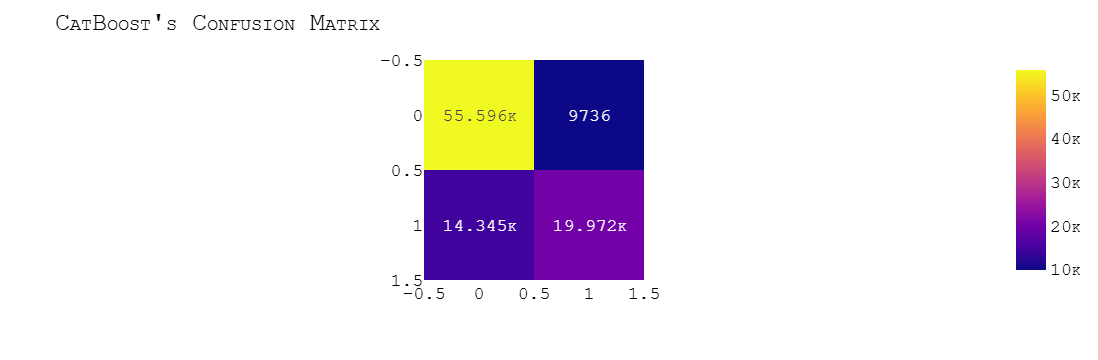

In [53]:
preds = ctb.predict(X_valid)

accuracy = ctb.score(X_valid, y_valid)


print(f"ctb acurracy: {accuracy*100:.2f}%")
print("\nClassification report")
print(classification_report(y_valid, preds))

cm = confusion_matrix(y_valid, preds)
fig = px.imshow(cm, text_auto=True).update_layout(title={"text": "CatBoost's Confusion Matrix"}, font=my_font).show()


In [ ]:
# feature_importance = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': ctb.get_feature_importance()
# }).sort_values(by='Importance', ascending=False)

# # Print top features
# print("\nTop Features by Importance (PredictionValuesChange):")
# print(feature_importance)

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance['Feature'][:20], feature_importance['Importance'][:20])
# plt.xlabel('Importance')
# plt.title('CatBoost Feature Importance (PredictionValuesChange)')
# plt.gca().invert_yaxis()  # Highest importance at top
# plt.tight_layout()
# plt.show()

# # Select top 10 features
# top_n = 25
# top_features = feature_importance['Feature'].head(top_n).tolist()
# print(f"\nTop {top_n} Features:")
# for i, (feat, imp) in enumerate(feature_importance.head(top_n).itertuples(index=False), 1):
#     print(f"{i}. {feat}: {imp:.2f}")

In [ ]:
X_train_top = X_train.drop(columns=['HEPATICA', 'CS_GESTANT', 'PUERPERA', 'SIND_DOWN', 'FATOR_RISC'])
X_test_top = X_test.drop(columns=['HEPATICA', 'CS_GESTANT', 'PUERPERA', 'SIND_DOWN', 'FATOR_RISC'])
X_valid = X_valid.drop(columns=['HEPATICA', 'CS_GESTANT', 'PUERPERA', 'SIND_DOWN', 'FATOR_RISC'])

In [ ]:
ctb = CatBoostClassifier(
  **params,     

)

ctb.fit(
    X_train_top, y_train,
    eval_set=(X_test_top, y_test)
)

y_pred = ctb.predict_proba(X_valid)[:, 1]
print("Validation AUC:", roc_auc_score(y_valid, y_pred))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, interaction_only=True, include_bias=False)

X_train_frac = X_train_top_2.sample(frac=0.1, random_state=42)
# Fit and transform training data
X_train_poly = poly.fit_transform(X_train_frac)

# Get new feature names
feature_names = poly.get_feature_names_out(X_train_frac.columns)

X_train_poly = pd.DataFrame(X_train_poly, columns=feature_names)

# Transform test data (do not fit on test to avoid leakage)
X_test_poly = pd.DataFrame(poly.transform(X_test), columns=feature_names)

# Print new features
print("\nOriginal features:", X_train_frac.columns.tolist())
print("\nNew polynomial features:", feature_names.tolist())
print(f"\nNumber of new features: {len(feature_names)}")